In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../1_dock')
sys.path.append('../../ifp')
sys.path.append('../../mcss')
sys.path.append('../../3_analyze')
from shared_paths import shared_paths
from containers import Protein
%matplotlib inline

assert shared_paths['docking'] == 'confgen_es4'

In [2]:
datasets = [d for d in sorted(os.listdir(shared_paths['data']))
            if d[0] != '.' and d[-3:] != 'old']

In [3]:
data = {}
for i, d in enumerate(datasets):
    print(i, d)
    protein = Protein(d)
    lm = protein.lm

    ligands = lm.docked(lm.pdb)[:20]
    protein.load_docking(ligands, False, False, False)
    lm.mcss.load_mcss()
    for ligand in ligands:
        crystal_lig = "{}_lig".format(lm.st)
        if ligand == crystal_lig:
            size = 'CRSYTAL'
        else:
            try:
                size = lm.mcss.get_mcss_size(ligand, crystal_lig)
            except:
                print protein, ligand
                continue
        rmsds = [pose.rmsd for pose in protein.docking[lm.st].ligands[ligand].poses]
        if d not in data: data[d] = {}
        data[d][ligand] = (size, rmsds)

(0, '5HT2B')
(1, 'A2AR')
(2, 'AR')
(3, 'B1AR')
(4, 'B2AR')
(5, 'BRAF')
<containers.Protein instance at 0x10651c9e0> 3Q4C_lig
(6, 'CDK2')
(7, 'CHK1')
(8, 'DTRANSP')
(9, 'ERA')
(10, 'GCR')
(11, 'GLUT1')
(12, 'JAK2')
(13, 'M3')
(14, 'MEK1')
(15, 'MGLUR5')
(16, 'MR')
(17, 'O60885')
(18, 'P00489')
(19, 'P00734')
(20, 'P00742')
(21, 'P00749')
(22, 'P00760')
(23, 'P03951')
(24, 'P07900')
(25, 'P18031')
(26, 'P24941')
(27, 'P56817')
(28, 'PLK1')
(29, 'Q16539')
(30, 'Q9Y233')
(31, 'SIGMA1')
(32, 'SMO')
(33, 'STRANSP')
(34, 'TRPV1')
(35, 'VITD')


In [4]:
print len(data)
print sum([len(v) for k, v in data.items()])
print
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print '{}\t{}'.format(key, count)

36
510

5HT2B	2
M3	2
SIGMA1	2
TRPV1	2
GLUT1	3
MGLUR5	5
SMO	5
STRANSP	5
B2AR	8
DTRANSP	9
AR	11
B1AR	12
MR	12
PLK1	12
P24941	13
P03951	14
O60885	17
A2AR	18
BRAF	19
GCR	19
CDK2	20
CHK1	20
ERA	20
JAK2	20
MEK1	20
P00489	20
P00734	20
P00742	20
P00749	20
P00760	20
P07900	20
P18031	20
P56817	20
Q16539	20
Q9Y233	20
VITD	20


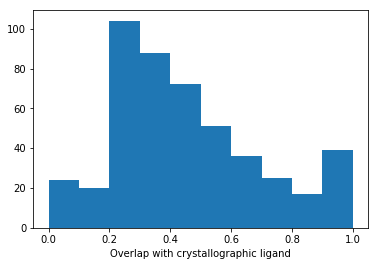

In [5]:
plt.hist([size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
          if size != 'CRSYTAL'])
plt.xlabel('Overlap with crystallographic ligand')
plt.show()

In [6]:
def plot(correct, total, crystal_correct, crystal_total, l1, l2, title):
    a = plt.hist([correct, total], label = [l1, l2], bins = 5)
    plt.xlabel('Overlap with crystallographic ligand')
    plt.legend()
    plt.show()

    correct, total = a[0]
    x = list((a[1][:-1] + a[1][1:]) / 2.0)

    plt.bar(x + [1.1], list(np.array(correct) / np.array(total))+[crystal_correct/ float(crystal_total)],  width = 0.1)
    plt.xlim(0, 1.2)
    plt.ylim(0, 1)
    plt.xticks([0, .2, .4, .6, .8, 1.0, 1.1], [0, .2, .4, .6, .8, 1.0, 'C'])
    plt.title(title)
    plt.xlabel('Overlap with crystallographic ligand')
    plt.show()

# Fraction top pose correct

0.436974789916


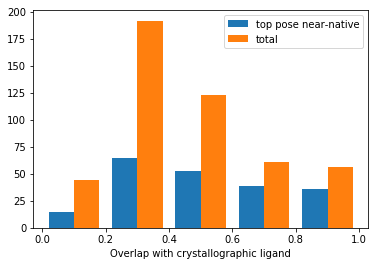

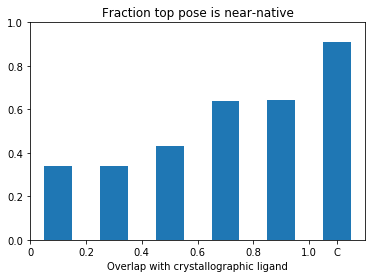

In [12]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
             if rmsds[0] <= 2.0 and size != 'CRSYTAL']
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
         if size != 'CRSYTAL']

print len(correct) / float(len(total))
             
crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if rmsds[0] <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if size == 'CRSYTAL'])

l1, l2, title = 'top pose near-native', 'total', 'Fraction top pose is near-native'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)

# Correct pose in top 100

0.689075630252
0.689075630252


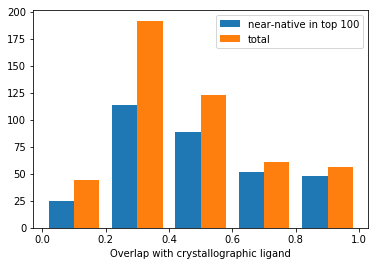

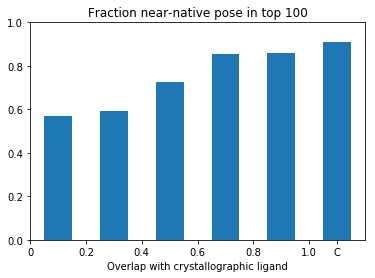

In [15]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
             if min(rmsds[:100]) <= 2.0 and size != 'CRSYTAL']
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
         if size != 'CRSYTAL']

print len(correct) / float(len(total))
crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if min(rmsds[:100]) <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if size == 'CRSYTAL'])

l1, l2, title = 'near-native in top 100', 'total', 'Fraction near-native pose in top 100'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)

# Top pose correct given that one exists in top 100

0.634146341463


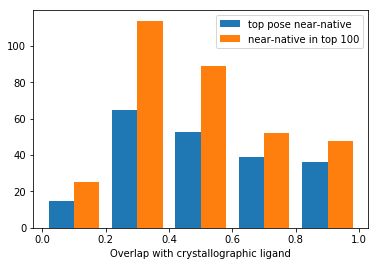

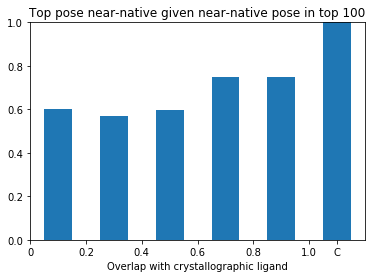

In [14]:
correct = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
           if rmsds[0] <= 2.0 and size != 'CRSYTAL']
total   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()
           if min(rmsds[:100]) <= 2.0 and size != 'CRSYTAL']

crystal_correct = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if rmsds[0] <= 2.0 and size == 'CRSYTAL'])
crystal_total   = sum([1 for protein, ligands in data.items() for (size, rmsds) in ligands.values()
                       if min(rmsds[:100]) <= 2.0 and size == 'CRSYTAL'])
print len(correct) / float(len(total))
l1, l2, title = 'top pose near-native', 'near-native in top 100', 'Top pose near-native given near-native pose in top 100'
plot(correct, total, crystal_correct, crystal_total, l1, l2, title)